<a href="https://colab.research.google.com/github/hufsaim/T10203101/blob/master/notebook/ch06_06_SystemsOfODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
from sympy.solvers.solveset import linsolve
from sympy import inverse_laplace_transform as invL
from sympy import laplace_transform as L

from sympy import Heaviside as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = sympy.symbols('s')
t = sympy.symbols('t', positive=True, real=True)

# Convolution.

## Example 5
- y'' + 3y' + 2y = r
- r = u(t-1) - u(t-2)
- y(0) = y'(0) = 0

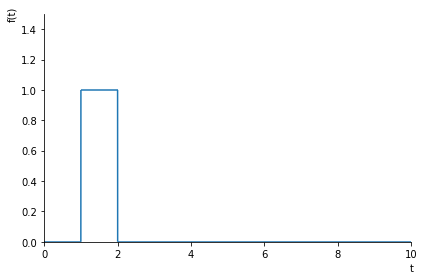

In [3]:
r = u(t-1)-u(t-2)
sympy.plot(r,xlim=[0,10],ylim=[0,1.5])
plt.show()

In [4]:
#R = sympy.exp(-s)/s - sympy.exp(-2*s)/s
R = L(r,t,s)
R[0]

(exp(s) - 1)*exp(-2*s)/s

In [5]:
invL(R[0],s,t)

-Heaviside(t - 2) + Heaviside(t - 1)

In [6]:
Q = 1/(s**2+3*s+2)
Q.apart(s)

-1/(s + 2) + 1/(s + 1)

In [7]:
q = invL(Q.apart(s),s,t)
q

(exp(t) - 1)*exp(-2*t)

In [8]:
q = invL(Q.apart(s).args[0],s,t) + invL(Q.apart(s).args[1],s,t)
q

exp(-t) - exp(-2*t)

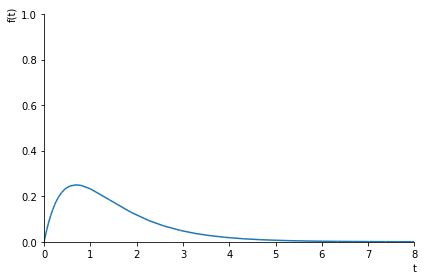

In [9]:
sympy.plot(q,xlim=[0,8],ylim=[0, 1])
plt.show()

# Systems of ODEs

In [10]:
Y1 = sympy.symbols('Y1')
Y2 = sympy.symbols('Y2')


## Example 1
- -y1' = -0.08 y1 + 0.02 y2 + 6
- y2' = 0.08 y1 - 0.08 y2
- y1(0) = 0, y2(0) = 150

In [11]:
Y = linsolve([
    (-0.08-s)*Y1 + 0.02*Y2 + 6/s,
    0.08*Y1 +(-0.08-s)*Y2 + 150    
    ],(Y1,Y2))
Y

FiniteSet((1.0*(9.0*s + 0.48)/(1.0*s**3 + 0.16*s**2 + 0.0048*s), 1.0*(150.0*s**2 + 12.0*s + 0.48)/(1.0*s**3 + 0.16*s**2 + 0.0048*s)))

In [12]:
Y1_ = Y.args[0][0].apart(s)
Y1_

-62.5/(1.0*s + 0.12) - 37.5/(1.0*s + 0.04) + 100.0/s

In [13]:
Y2_ = Y.args[0][1].apart(s)
Y2_

125.0/(1.0*s + 0.12) - 75.0/(1.0*s + 0.04) + 100.0/s

In [14]:
y1 = invL(Y1_.args[0],s,t) + invL(Y1_.args[1],s,t) + invL(Y1_.args[2],s,t)
y1

100.0 - 62.5*exp(-0.12*t) - 37.5*exp(-0.04*t)

In [15]:
y2 = invL(Y2_.args[0],s,t) + invL(Y2_.args[1],s,t) + invL(Y2_.args[2],s,t)
y2

100.0 + 125.0*exp(-0.12*t) - 75.0*exp(-0.04*t)

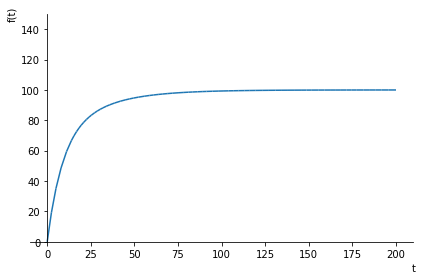

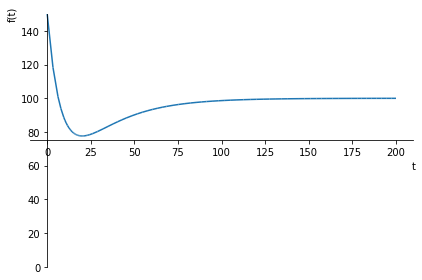

In [16]:
sympy.plot(y1,(t,0,200),ylim=[0,150])
sympy.plot(y2,(t,0,200),ylim=[0,150])

## Example 2
다음과 같은 ODE system이 있다.
- y1'- 2y1 + 3y2 = 0
- y2'- y1 + 2y2 = 0
- y1(0) = 1
- y2(0) = 0

### 직접 해보기
- Python을 활용하여 y1, y2를 구하고 y1과 y2를 plot해보자.